# Chapter 6

# K-Means Clustering

## 6.1 A New Marketing Plan for a Wholesale Distributor

The first step we take a tackling this problem is by taking a look at the dataset we have via a random sample

In [2]:
import pandas as pd

data = pd.read_csv("../datasets/wholesale.csv")
data.sample(10, random_state=42)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
265,1,1,5909,23527,13699,10155,830,3636
78,1,3,10766,1175,2067,2096,301,167
347,2,3,27380,7184,12311,2809,4621,1022
255,1,1,31614,489,1495,3242,111,615
327,1,2,542,899,1664,414,88,522
291,1,3,6022,3354,3261,2507,212,686
184,1,3,327,918,4710,74,334,11
82,2,3,10362,9232,11009,737,3537,2342
438,1,3,10290,1981,2232,1038,168,2125
405,1,3,6884,1046,1167,2069,593,378


---
Before we can apply scikit-learn's `Kmeans` module on our customers data, we first need to extract the relevant data to the problem, which are all the continous features that represent the amount of money spent on different products.

In [3]:
X = data.loc[:, "Fresh":"Delicassen"]

---
Prior to using the data to fit our k-means model, it'd be a good idea to look at their descriptive statistics and see what they tell us about the data and whether if there's a problem that we need to take into consideration. We can quickly do that with the `describe` method of pandas `DataFrame`.

In [4]:
X.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


---
### 6.1.2 All Features Shall be Equal
As we can see from the descriptive statistics above, the features have very different standard deviations (hence, variances). This can cause problems with models that use Euclidean distnaces such as our Kmeans method. We can see this problem by looking at how one point form our data is assigned to one of two randomly chosen centroids.

In [5]:
X.loc[[110, 124, 240]]  # just to display the points

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
110,11818,1648,1694,2276,169,1647
124,36050,1642,2961,4787,500,1621
240,22096,3575,7041,11422,343,2564


In [6]:
import numpy as np

bad_X_df = X.loc[[110, 124, 240]]
bad_X = bad_X_df.as_matrix()  # underlying ndarrays

def d(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

print("Distance to 1st centroid: {:.2f}".format(d(bad_X[0], bad_X[1])))
print("Distance to 2nd centroid: {:.2f}".format(d(bad_X[0], bad_X[2])))

Distance to 1st centroid: 24396.94
Distance to 2nd centroid: 14915.14


In [7]:
(bad_X_df - bad_X_df.loc[110]) ** 2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
110,0,0,0,0,0,0
124,587189824,36,1605289,6305121,109561,676
240,105637284,3713329,28590409,83649316,30276,840889


---
Intutively, one would think that the closest centroid to the point is the first one, but the distance calculations say otherwise. It seems that the difference in higher variance components outweighs the small differences in the lesser variance ones. We can solve this by scaling the data into a common scale using `StandardScaler`

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_bad_X = scaler.transform(bad_X)

print("[Scaled] Distance to 1st centroid: {:.2f}".format(d(scaled_bad_X[0], scaled_bad_X[1])))
print("[Scaled] Distance to 2nd centroid: {:.2f}".format(d(scaled_bad_X[0], scaled_bad_X[2])))

[Scaled] Distance to 1st centroid: 1.99
[Scaled] Distance to 2nd centroid: 2.17


/home/mostafa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


---
### 6.1.3 Applying K-means with scikit-learn
Now that we have scaled our data and got rid of the different variance problem, we're now ready to apply the k-means method on our data using scikit-learn. We set the number of clusters to be 5 for now

In [9]:
from sklearn.cluster import KMeans

scaled_X = scaler.transform(X)

model = KMeans(n_clusters=5, n_init=20)
model.fit(scaled_X)

print("Minimum Inertia: {:.2f}".format(model.inertia_))

Minimum Inertia: 1058.77


In [10]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
reduced_X = reducer.fit_transform(scaled_X)

print("Reduced Shape: {}, vs. Original Shape: {}".format(reduced_X.shape, scaled_X.shape))

Reduced Shape: (440, 2), vs. Original Shape: (440, 6)


Text(0,0.5,'Second Principal Component')

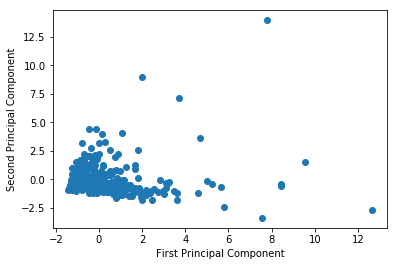

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(reduced_X[:, 0], reduced_X[:, 1])

# these change the labels of the x and y axes
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

Text(0,0.5,'Second Principal Component')

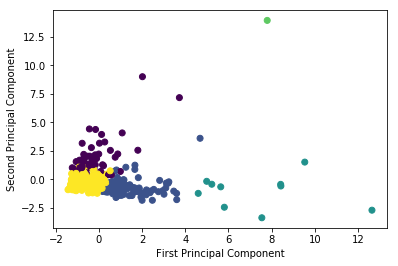

In [12]:
plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=model.labels_)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

Text(0,0.5,'Second Principal Component')

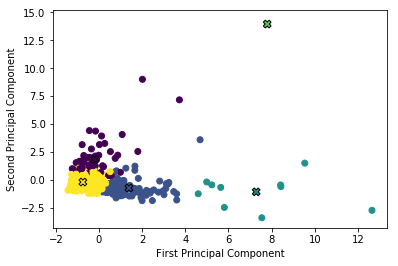

In [13]:
reduced_centroids = reducer.transform(model.cluster_centers_)

plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=model.labels_)
plt.scatter(
    reduced_centroids[:, 0], reduced_centroids[:, 1], 
    marker='X', s=60, c=np.arange(0, 5), edgecolors='black'
)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

In [14]:
def find_best_k(max_k):
    lowest_inertia, best_k = np.inf, None
    for k in range(1, max_k + 1):
        model = KMeans(n_clusters=k)
        model.fit(scaled_X)
        if model.inertia_ < lowest_inertia:
            lowest_inertia = model.inertia_
            best_k = k
            
    return best_k

print("Best k is: {}".format(find_best_k(10)))

Best k is: 10


In [15]:
print("Best k is: {}".format(find_best_k(30)))

Best k is: 30


Text(0,0.5,'Inertia')

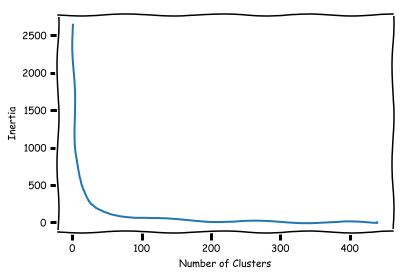

In [47]:
data_size, _ = scaled_X.shape

inertias = []
for k in range(1, data_size + 1):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    inertias.append(model.inertia_)
    
plt.plot(np.arange(1, data_size + 1), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

Best k is: 2, with Silhouette Score: 0.61


Text(0,0.5,'Silhouette Score')

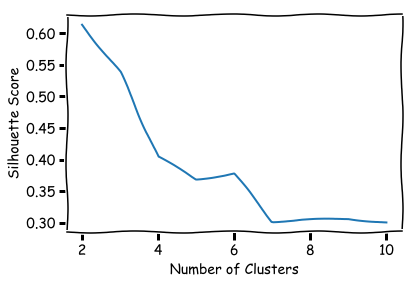

In [22]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_X)
    silhouette_scores.append(silhouette_score(scaled_X, model.labels_))
    
best_k = np.argmax(silhouette_scores) + 2
best_silhouette = np.max(silhouette_scores)
print("Best k is: {}, with Silhouette Score: {:.2f}".format(best_k, best_silhouette))

plt.plot(np.arange(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")

In [19]:
best_model = KMeans(n_clusters=2, random_state=42)
best_model.fit(scaled_X)

first_cluster_mask = best_model.labels_ == 0
first_cluster = data[first_cluster_mask]
second_cluster = data[~first_cluster_mask]

In [20]:
second_cluster.mean()

Channel                 1.916667
Region                  2.444444
Fresh               13556.194444
Milk                21922.972222
Grocery             30602.888889
Frozen               4968.694444
Detergents_Paper    14516.333333
Delicassen           4142.361111
dtype: float64

In [21]:
first_cluster.mean()

Channel                 1.269802
Region                  2.551980
Fresh               11861.653465
Milk                 4359.232673
Grocery              5932.816832
Frozen               2902.913366
Detergents_Paper     1844.725248
Delicassen           1291.628713
dtype: float64

---
<font color='darkred'>
<h4> Exercise 6.1 </h4>
<br/>
To further appreciate the value of feature scaling, repeat the script where we tuned the value of k using silhouette score but this time with the unscaled version of the data.  Notice what happens to the best silhouette score due to that change.
</font>

In [ ]:
# Your solution goes here

## 6.3 Limitations of K-means

# [TO BE REMOVED]

In [7]:
import numpy as np
customer_1 = np.array([12435, 1012, 2062, 1291, 240, 1775])
customer_2 = np.array([35435, 1100, 2300, 1501, 274, 1878])
customer_3 = np.array([10678, 7015, 8109, 10765, 3000, 10876])

In [8]:
def d(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

In [36]:
print(d(customer_1, customer_2))
print(d(customer_1, customer_3))

23002.6140471
15996.6166423


In [39]:
mu = np.mean([customer_1, customer_2, customer_3], axis=0)
std = np.std([customer_1, customer_2, customer_3], axis=0)

In [40]:
sc1 = (customer_1 - mu) / std
sc2 = (customer_2 - mu) / std
sc3 = (customer_3 - mu) / std

In [41]:
sc1

array([-0.62778921, -0.72271106, -0.74923789, -0.73074312, -0.72021237,
       -0.71914412])

In [43]:
sc3

array([-0.78356179,  1.41409792,  1.4133595 ,  1.4139472 ,  1.41413209,
        1.41414487])

In [44]:
print(d(sc1, sc2))
print(d(sc1, sc3))

2.04202177447
4.79302513288


In [54]:
from sklearn.neighbors import NearestNeighbors
clf = NearestNeighbors(n_neighbors=1)
clf.fit(X)

clf.kneighbors(np.expand_dims(customer_1, axis=0))

(array([[ 1382.84453211]]), array([[110]]))

In [56]:
X.iloc[110]

Fresh               11818
Milk                 1648
Grocery              1694
Frozen               2276
Detergents_Paper      169
Delicassen           1647
Name: 110, dtype: int64

In [57]:
clf.kneighbors(np.expand_dims(customer_2, axis=0))

(array([[ 3467.53961765]]), array([[124]]))

In [58]:
X.iloc[124]

Fresh               36050
Milk                 1642
Grocery              2961
Frozen               4787
Detergents_Paper      500
Delicassen           1621
Name: 124, dtype: int64

In [59]:
clf.kneighbors(np.expand_dims(customer_3, axis=0))

(array([[ 9692.94743615]]), array([[230]]))

In [60]:
X.iloc[230]

Fresh               11072
Milk                 5989
Grocery              5615
Frozen               8321
Detergents_Paper      955
Delicassen           2137
Name: 230, dtype: int64

In [5]:
problamatic_X = X.iloc[[110, 124, 240]]
problamatic_X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
110,11818,1648,1694,2276,169,1647
124,36050,1642,2961,4787,500,1621
240,22096,3575,7041,11422,343,2564


In [9]:
d(problamatic_X.iloc[0], problamatic_X.iloc[1])

24396.936426526998

In [10]:
d(problamatic_X.iloc[0], problamatic_X.iloc[2])

14915.143411982333

In [12]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
#scaler.fit(X)
scaled_X = scaler.fit_transform(problamatic_X)

In [20]:
d(scaled_X[0], scaled_X[1])

3.5615436193375087

In [21]:
d(scaled_X[0], scaled_X[2])

4.7643118389327856

/home/mostafa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


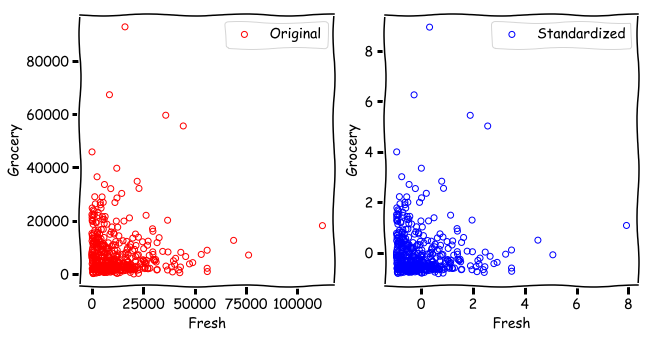

In [64]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

XFG = X.loc[:, ["Fresh", "Grocery"]].as_matrix()
scaled_XFG = StandardScaler().fit_transform(XFG)

with plt.xkcd():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.set_xlabel("Fresh")
    ax1.set_ylabel("Grocery")
    ax2.set_xlabel("Fresh")
    ax2.set_ylabel("Grocery")
    ax1.scatter(XFG[:, 0], XFG[:, 1], color='red', facecolor='none', label='Original')
    ax2.scatter(scaled_XFG[:, 0], scaled_XFG[:, 1], color='blue', facecolor='none', label='Standardized')
    ax1.legend()
    ax2.legend()

In [35]:
from sklearn.model_selection import train_test_split

scaled_X_train, scaled_X_test = train_test_split(scaled_X)

In [40]:
highest_score = -np.inf
best_k = -1
for k in range(2, 15):
    c = KMeans(n_clusters=k)
    c.fit(scaled_X_train)
    score = c.score(scaled_X_test)
    print(score)
    if score > highest_score:
        best_k = k
        highest_score = score
        
print(best_k)

-367.095589648
-351.256216985
-299.68552436
-216.954027618
-214.475952732
-214.308448271
-197.569434324
-199.057149124
-158.634992622
-157.112443994
-174.431568904
-150.490333977
-152.505181204
13


Cluster 0's Covariance: 23.874059861978026
Cluster 1's Covariance: 21.6755722197257


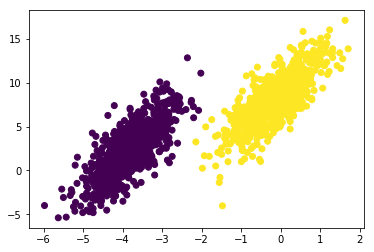

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles

X, y = make_blobs(n_samples=1500, centers=2, random_state=170)
np.random.seed(170)
transformation = np.random.normal(size=(2,2))
X_scaled = np.dot(X, transformation)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
for i in range(2):
    cluster_mask = (y == i)
    cluster = X_scaled[cluster_mask]
    cluster_variance_ratio = np.max(np.var(cluster, axis=0)) / np.min(np.var(cluster, axis=0))
    print("Cluster {}'s Covariance: {}".format(i, cluster_variance_ratio))

Cluster 0's Covariance: 5.298211845591938
Cluster 1's Covariance: 4.594355406815718


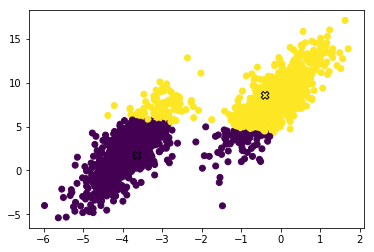

In [71]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, n_init=50)
model.fit(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=model.labels_)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c=[0, 1], marker='X', s=60, edgecolors='black')
for i in range(2):
    cluster_mask = (model.labels_ == i)
    cluster = X_scaled[cluster_mask]
    cluster_variance_ratio = np.max(np.var(cluster, axis=0)) / np.min(np.var(cluster, axis=0))
    print("Cluster {}'s Covariance: {}".format(i, cluster_variance_ratio))

In [3]:
T = np.array(transformation)
T

array([[-0.2074613 ,  0.52837669],
       [ 0.43637938,  0.68920976]])

In [5]:
np.dot(T.T, T)

array([[ 0.48318439,  0.43719471],
       [ 0.43719471,  0.86844229]])

In [39]:
np.cov(X_scaled.T)

array([[  0.05781623,  -1.20811969],
       [ -1.20811969,  29.26940674]])

In [40]:
np.cov(X.T)

array([[ 20.87167553,  10.06322781],
       [ 10.06322781,   8.16988176]])

In [27]:
X = np.random.multivariate_normal([0, 0], [[1., 0], [0, 1.]], size=10000000)

In [32]:
X_ = np.dot(X, T)

In [34]:
np.cov(X_.T)

array([[ 0.70412704, -0.94092769],
       [-0.94092769,  2.54285851]])

Blobs
    - True clusters std ratio: (1.08, 1.02)
    - K-means clusters std ratio: (1.08, 1.02)
Elongated
    - True clusters std ratio: (4.89, 4.66)
    - K-means clusters std ratio: (2.30, 2.14)
Moons
    - True clusters std ratio: (2.28, 2.27)
    - K-means clusters std ratio: (1.37, 1.36)
Concentric Circles
    - True clusters std ratio: (1.00, 1.01)
    - K-means clusters std ratio: (1.63, 1.63)


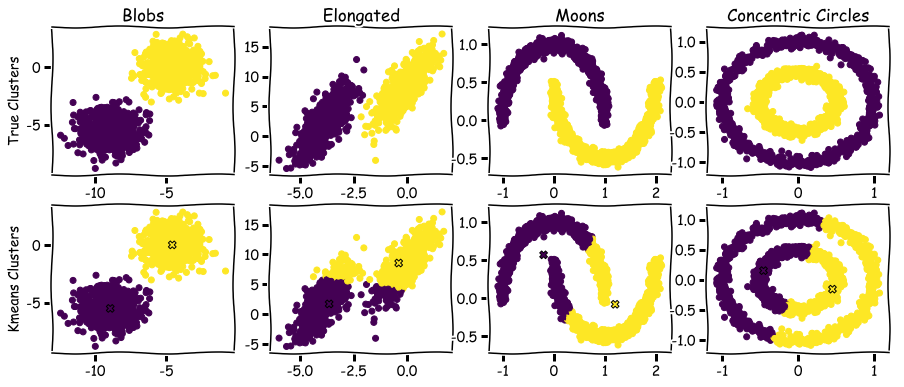

In [20]:
from sklearn.datasets import make_blobs, make_moons, make_circles

plt.xkcd()
fig, axes = plt.subplots(2, 4, figsize=(15, 6))

for i, data_shape in enumerate([
    'Blobs', 'Elongated', 'Moons', 'Concentric Circles'
]):

    original_axis = axes[0, i]
    kmeans_axis = axes[1, i]
    
    # labels each row in the plot with what it represents
    if i == 0:
        original_axis.set_ylabel("True Clusters")
        kmeans_axis.set_ylabel("Kmeans Clusters")
    
    # generate the dataset using sklearn.dataset methods given the shape
    if data_shape == 'Blobs':
        X, y = make_blobs(n_samples=1500, centers=2, random_state=170)
    elif data_shape == 'Elongated':
        X, y = make_blobs(n_samples=1500, centers=2, random_state=170)
        transformation = np.array(
            [[ 0.03412646, -1.76449409],
             [ 0.63937541,  2.45397584]]
        )
        
        # this transforms the circular blobs into ellipsoidal ones 
        X = np.dot(X, transformation)
        
    elif data_shape == 'Moons':
        X, y = make_moons(n_samples=1500, random_state=170, noise=0.05)
    else:
        X, y = make_circles(
            n_samples=1500, random_state=170, factor=0.5, noise=0.05)
    
    # scatter plot the data with their true labels
    original_axis.scatter(X[:, 0], X[:, 1], c=y)
    original_axis.set_title(data_shape)
    
    # fit a kmeans model to the data
    kmeans_model = KMeans(n_clusters=2)
    kmeans_model.fit(X)
    centroids = kmeans_model.cluster_centers_
    predicted = kmeans_model.labels_
    
    # scatter plot the kmeans clustering along with the centroids
    kmeans_axis.scatter(X[:, 0], X[:, 1], c=predicted)
    kmeans_axis.scatter(
        centroids[:, 0], centroids[:, 1], c=[0, 1], marker='X', s=60, edgecolors='black'
    )
    
    # calculate and print the standard deviation ratios in both cluster
    # in both settings, the original and the fitted kmeans
    print(data_shape)
    print("=================")
    for clustering in ["True", "K-means"]:
        std_ratios = []
        for label in [0, 1]:
            labels = y if clustering == "True" else predicted
            cluster = X[(labels == label)]
            stds = np.std(cluster, axis=0)
            std_ratios.append(np.max(stds) / np.min(stds))

        print("    - {} clusters std ratio: ({:.2f}, {:.2f})".format(clustering, *std_ratios))   

In [30]:
transformation

array([[ 0.03412646, -1.76449409],
       [ 0.63937541,  2.45397584]])

7


Text(0.5,0,'k-means clusters with higest silhoutte score')

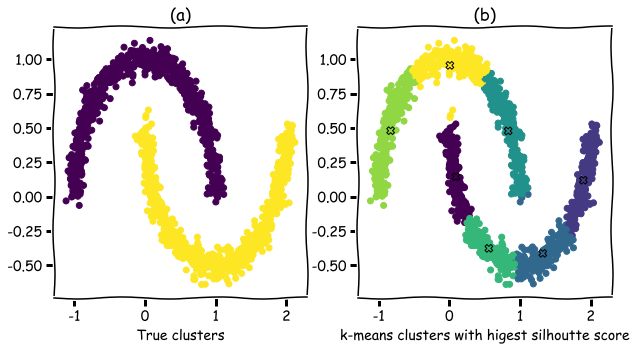

In [23]:
plt.xkcd()

X, y = make_moons(n_samples=1500, noise=0.05, random_state=42)
best_k = 1
best_labels = None
best_score = 0
best_centers = None
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    sil_score = silhouette_score(X, model.labels_)
    if sil_score > best_score:
        best_score = sil_score
        best_k= k
        best_labels = model.labels_
        best_centers = model.cluster_centers_
        
print(best_k)

_, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title("(a)")
axes[0].set_xlabel("True clusters")
axes[1].scatter(X[:, 0], X[:, 1], c=best_labels)
axes[1].scatter(best_centers[:, 0], best_centers[:, 1], c=np.arange(0, best_k), marker='X', s=60, edgecolor='black')
axes[1].set_title("(b)")
axes[1].set_xlabel("k-means clusters with higest silhoutte score")

[73.994830608212609,
 1.3493987625167205,
 0.80072900863565522,
 0.59498059068280706,
 0.46656078432021703,
 0.39290371740854418,
 0.32361090433102452,
 0.26854345705228666,
 0.31495727511587424,
 0.24962881052112912,
 0.21492926483379612,
 0.20752462218241777,
 0.19368938243625558,
 0.21626878451262269,
 0.16886830889545912,
 0.16908880563820902,
 0.16973372875750492,
 0.17273922492734528,
 0.18631114655509917,
 0.16796231201606326,
 0.15153087753941388,
 0.13423550951259566,
 0.1381065307720222,
 0.14991063615910044,
 0.14377923030148643,
 0.12854147897470822,
 0.13917762262469849,
 0.12997816546059415,
 0.12609356730368174,
 0.11451245632476842,
 0.13579328188282655,
 0.13687726902244163,
 0.11382587282213313,
 0.11523872387128886,
 0.13776318488560679,
 0.11078758563819895,
 0.1132360122606887,
 0.1069355222773247,
 0.10389749445759046,
 0.095056711517985684,
 0.10056316886805904,
 0.11320206029553216,
 0.098145121285293402,
 0.10118877722401169,
 0.10068152051241126,
 0.0889889145

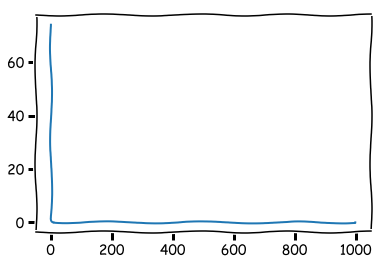

In [33]:
mean_ratios = []
for d in range(1, 1000):
    ratios = []
    for _ in range(100):
        data = np.random.uniform(-1000, 1000, size=(3, d))
        d01 = np.sqrt(np.sum((data[0] - data[1]) ** 2))
        d02 = np.sqrt(np.sum((data[0] - data[2]) ** 2))
        ratios.append(np.abs(d01 - d02) / np.min([d01, d02]))
    mean_ratios.append(np.mean(ratios))
    
plt.plot(np.arange(1, 1000), mean_ratios)

mean_ratios